In [176]:
# Common imports
import numpy as np
import os

from math import log
import pandas as pd
import operator
import numpy as np
import matplotlib.pyplot as plt

# 载入数据并查看

In [177]:
import pandas as pd
csv_path=os.path.join("datas", "salary","分类贝叶斯.csv")
iris=pd.read_csv(csv_path,sep=',',header=0,encoding="ISO-8859-1")
iris

,department,status,age,salary
0,Sales,Senior,3135,46K50K
1,Sales,Junior,2630,26K30K
2,Sales,Junior,3135,31K35K
3,Systems,Junior,2125,46K50K
4,Systems,Senior,3135,66K70K
5,Systems,Junior,2630,46K50K
6,Systems,Senior,4145,66K70K
7,Marketing,Senior,3640,46K50K
8,Marketing,Junior,3135,41K45K
9,Secretary,Senior,4650,36K40K


In [178]:
iris.describe

<bound method NDFrame.describe of    department  status   age  salary
0       Sales  Senior  3135  46K50K
1       Sales  Junior  2630  26K30K
2       Sales  Junior  3135  31K35K
3     Systems  Junior  2125  46K50K
4     Systems  Senior  3135  66K70K
5     Systems  Junior  2630  46K50K
6     Systems  Senior  4145  66K70K
7   Marketing  Senior  3640  46K50K
8   Marketing  Junior  3135  41K45K
9   Secretary  Senior  4650  36K40K
10  Secretary  Junior  2630  26K30K>

In [179]:
spec=iris.columns
spec

Index(['department', 'status', 'age', 'salary'], dtype='object')

In [180]:
test=pd.Series(iris['status'].value_counts())
test

Junior    6
Senior    5
Name: status, dtype: int64

In [181]:
print(iris['status'].value_counts(),iris['status'].value_counts().index,iris['status'].value_counts()[1],sep='\n')

Junior    6
Senior    5
Name: status, dtype: int64
Index(['Junior', 'Senior'], dtype='object')
5


# 查看公式

## 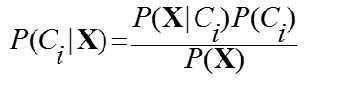

# 理出计划 
输入x={department:key0,age:key1,salary:key2}
输出p(junier|x)和p(senier|y)


In [208]:
x=pd.Series({'department':'Marketing','age':2125,'salary':'26K30K'})

## 必要知识

### pandas
    选择行列：https://blog.csdn.net/qq_38328378/article/details/81166518
    统计数量与频率iris['Species'].value_counts()

In [183]:
help(iris)

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame)
 |  Two-dimensional size-mutable, potentially heterogeneous tabular data
 |  structure with labeled axes (rows and columns). Arithmetic operations
 |  align on both row and column labels. Can be thought of as a dict-like
 |  container for Series objects. The primary pandas data structure
 |  
 |  Parameters
 |  ----------
 |  data : numpy ndarray (structured or homogeneous), dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects
 |  index : Index or array-like
 |      Index to use for resulting frame. Will default to np.arange(n) if
 |      no indexing information part of input data and no index provided
 |  columns : Index or array-like
 |      Column labels to use for resulting frame. Will default to
 |      np.arange(n) if no column labels are provided
 |  dtype : dtype, default None
 |      Data type to force. Only a single dtype is allowed. If No

In [184]:
#计算每列不同元素的数量
coun=iris['status'].value_counts()
coun

Junior    6
Senior    5
Name: status, dtype: int64

In [185]:
#计算概率
rat=coun/sum(coun)
rat

Junior    0.545455
Senior    0.454545
Name: status, dtype: float64

In [186]:
#存储列索引
spec=iris.columns
spec

Index(['department', 'status', 'age', 'salary'], dtype='object')

#### 将以上两者合成形成p(x）  px函数

#### 计算p(column1|column2)


In [187]:
D='status'
daframe=iris
for i in range(len(iris[D].value_counts())):
    #为dataframe中D的每一个取值拆分出叫做temp的，包含该取值的dataframe
    temp=daframe[daframe[D]==coun.index[i]]
    print(temp)
    print(ent(temp,D),'@@@@@@@',D)
    #print(ent(temp,D))
    #print(gain)

   department  status   age  salary
1       Sales  Junior  2630  26K30K
2       Sales  Junior  3135  31K35K
3     Systems  Junior  2125  46K50K
5     Systems  Junior  2630  46K50K
8   Marketing  Junior  3135  41K45K
10  Secretary  Junior  2630  26K30K
Junior    1.0
Name: status, dtype: float64 @@@@@@@ status
  department  status   age  salary
0      Sales  Senior  3135  46K50K
4    Systems  Senior  3135  66K70K
6    Systems  Senior  4145  66K70K
7  Marketing  Senior  3640  46K50K
9  Secretary  Senior  4650  36K40K
Senior    1.0
Name: status, dtype: float64 @@@@@@@ status


#### 这样我们得到了基于status分块的矩阵，接下来是分别调用px函数完成p(x|c)

In [188]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



### 自闭调试

In [189]:
D='status'
daframe=iris
indextp=[]
for j in spec:
    for i in daframe[j].value_counts().index:
        indextp.append(i)
frame = pd.DataFrame(np.zeros([len(indextp), len(iris[D].value_counts())]), 
                  columns=daframe[D].value_counts().index, 
                  index=indextp)
print(frame)
print(frame.index)

           Junior  Senior
Systems       0.0     0.0
Sales         0.0     0.0
Marketing     0.0     0.0
Secretary     0.0     0.0
Junior        0.0     0.0
Senior        0.0     0.0
3135          0.0     0.0
2630          0.0     0.0
2125          0.0     0.0
4650          0.0     0.0
3640          0.0     0.0
4145          0.0     0.0
46K50K        0.0     0.0
66K70K        0.0     0.0
26K30K        0.0     0.0
31K35K        0.0     0.0
36K40K        0.0     0.0
41K45K        0.0     0.0
Index([  'Systems',     'Sales', 'Marketing', 'Secretary',    'Junior',
          'Senior',        3135,        2630,        2125,        4650,
              3640,        4145,    '46K50K',    '66K70K',    '26K30K',
          '31K35K',    '36K40K',    '41K45K'],
      dtype='object')


In [195]:
print(frame.loc['Senior','Junior'])
j,iris[D].value_counts().index[0]

0.0


('salary', 'Junior')

In [196]:
iris['salary'].value_counts().index

Index(['46K50K', '66K70K', '26K30K', '31K35K', '36K40K', '41K45K'], dtype='object')

In [203]:
D='status'
daframe=iris
indextp=[]
for j in spec:
    for i in daframe[j].value_counts().index:
        indextp.append(i)
frame = pd.DataFrame(np.zeros([len(indextp), len(iris[D].value_counts())]), 
                  columns=daframe[D].value_counts().index, 
                  index=indextp)



for i in range(len(iris[D].value_counts())):
    #为dataframe中D的每一个取值拆分出叫做temp的，包含该取值的dataframe
    temp=daframe[daframe[D]==coun.index[i]]
    for j in spec:
        if j!=D:
            for k in iris[j].value_counts().index:
                #print('k=',k,px(temp,j))
                try:
                    frame.loc[k,iris[D].value_counts().index[i]]=px(temp,j)[k]
                except:
                    print('error happened\n',px(temp,j),'\n',k)
                print(iris[D].value_counts().index[i])
        #pd.Series(r)
        #print("__________\n",r,"\np({}|{})".format(j,iris[D].value_counts().index[i]))
    #print(ent(temp,D))
    #print(gain)
print(frame)

Junior
Junior
Junior
Junior
Junior
Junior
Junior
error happened
 2630    0.500000
3135    0.333333
2125    0.166667
Name: age, dtype: float64 
 4650
Junior
error happened
 2630    0.500000
3135    0.333333
2125    0.166667
Name: age, dtype: float64 
 3640
Junior
error happened
 2630    0.500000
3135    0.333333
2125    0.166667
Name: age, dtype: float64 
 4145
Junior
Junior
error happened
 46K50K    0.333333
26K30K    0.333333
31K35K    0.166667
41K45K    0.166667
Name: salary, dtype: float64 
 66K70K
Junior
Junior
Junior
error happened
 46K50K    0.333333
26K30K    0.333333
31K35K    0.166667
41K45K    0.166667
Name: salary, dtype: float64 
 36K40K
Junior
Junior
Senior
Senior
Senior
Senior
Senior
error happened
 3135    0.4
4650    0.2
4145    0.2
3640    0.2
Name: age, dtype: float64 
 2630
Senior
error happened
 3135    0.4
4650    0.2
4145    0.2
3640    0.2
Name: age, dtype: float64 
 2125
Senior
Senior
Senior
Senior
Senior
Senior
error happened
 46K50K    0.4
66K70K    0.4
36K40K

## 计算p(x)

In [213]:
def px(daframe,colum):
    """输入dataframe以及需要计算熵的列索引，输出熵"""
    coun=daframe[colum].value_counts()
    rat=coun/sum(coun)
    return rat
print(px(iris,'status'))
px(iris,'status')['Junior']

Junior    0.545455
Senior    0.454545
Name: status, dtype: float64


0.5454545454545454

## 计算相对概率

In [212]:
def pxy(daframe,D):
    """
    输入dataframe和准备预测的对象所在列
    输出为一个dataframe
    其中列是预测所在列的所有元素
    行是 该dataframe所有变量所在
    """
    #D='status'
    #daframe=iris
    indextp=[]
    for j in spec:
        for i in daframe[j].value_counts().index:
            indextp.append(i)
    frame = pd.DataFrame(np.zeros([len(indextp), len(iris[D].value_counts())]), 
                      columns=daframe[D].value_counts().index, 
                      index=indextp)



    for i in range(len(iris[D].value_counts())):
        #为dataframe中D的每一个取值拆分出叫做temp的，包含该取值的dataframe
        temp=daframe[daframe[D]==coun.index[i]]
        for j in spec:
            if j!=D:
                for k in iris[j].value_counts().index:
                    #print('k=',k,px(temp,j))
                    try:
                        frame.loc[k,iris[D].value_counts().index[i]]=px(temp,j)[k]
                    except:
                        #print('error happened\n',px(temp,j),'\n',k) 如果条件概率为0会发生报错，特此修复
                        pass
                    #print(iris[D].value_counts().index[i])
            #pd.Series(r)
            #print("__________\n",r,"\np({}|{})".format(j,iris[D].value_counts().index[i]))
        #print(ent(temp,D))
        #print(gain)
    return frame
prob=pxy(iris,'status')
prob

,Junior,Senior
Systems,0.333333,0.4
Sales,0.333333,0.2
Marketing,0.166667,0.2
Secretary,0.166667,0.2
Junior,0.000000,0.0
Senior,0.000000,0.0
3135,0.333333,0.4
2630,0.500000,0.0
2125,0.166667,0.0
4650,0.000000,0.2


## 开始计算

In [266]:
#输入
x=pd.Series({'department':'Marketing','age':3135,'salary':'26K30K'})

## 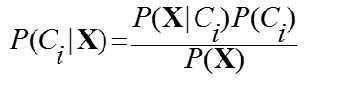

In [249]:
x.index[0]

'age'

In [276]:
px(iris,x.index[0])[3135]

0.36363636363636365

###### P\left(C_{i} | \mathbf{X}\right)=\frac{P\left(\mathbf{X} | C_{i}\right) P\left(C_{i}\right)}{P(\mathbf{X})}

In [286]:

for j in iris['status'].value_counts().index:
    p=px(iris,'status')[j]
    for i in range(len(x)):
        p*=prob.loc[x[i],j]/px(iris,x.index[i])[x[i]]
    print(p)
    #可见接下来需要解决的是laplace平滑

0.8402777777777776
0.0
